In [1]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report


import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


2021-11-06 17:22:23.498894: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot:>

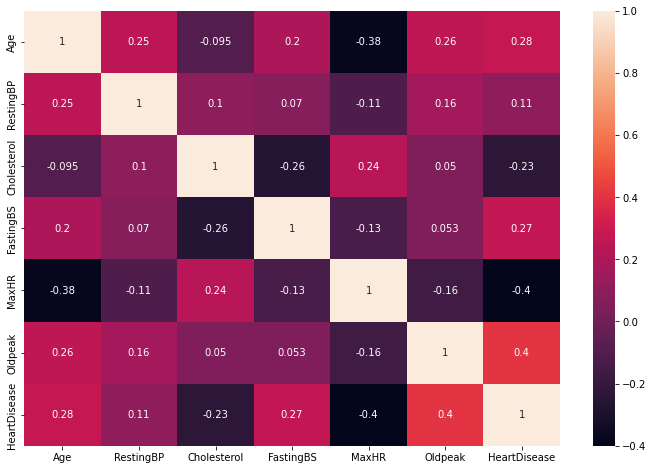

In [4]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True)

In [5]:
label_encoder = LabelEncoder()
data['Sex']= label_encoder.fit_transform(data['Sex'])
data['ExerciseAngina']= label_encoder.fit_transform(data['ExerciseAngina'])

In [6]:
data = pd.get_dummies(data)
data

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,0,0,0,1,0,1,0,0,1,0
914,68,1,144,193,1,141,0,3.4,1,1,0,0,0,0,1,0,0,1,0
915,57,1,130,131,0,115,1,1.2,1,1,0,0,0,0,1,0,0,1,0
916,57,0,130,236,0,174,0,0.0,1,0,1,0,0,1,0,0,0,1,0


In [7]:
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
os = SMOTE(sampling_strategy='minority',random_state = 1,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(X_train,y_train)
X_train = pd.DataFrame(data = train_smote_X, columns=X_train.columns)
y_train = pd.DataFrame(data = train_smote_Y)

In [10]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classifier.score(X_test, y_test))
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

0.8532608695652174
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



/home/meraj/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))

0.8804347826086957
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        77
           1       0.91      0.88      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



/home/meraj/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [13]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
print(svc.score(X_test, y_test))
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

0.8586956521739131
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



/home/meraj/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
model = Sequential()
model.add(Dense(16, activation='swish')) # First hidden layer
model.add(Dropout(0.25))
model.add(Dense(16, activation='swish')) # Second hidden layer
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid')) # Output layer

In [23]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [24]:
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size=32, epochs=300)

Epoch 1/300
26/26 [==============================] - 1s 18ms/step - loss: 0.7300 - accuracy: 0.5208 - val_loss: 0.6600 - val_accuracy: 0.6359
Epoch 2/300
26/26 [==============================] - 0s 10ms/step - loss: 0.6479 - accuracy: 0.6561 - val_loss: 0.5890 - val_accuracy: 0.7609
Epoch 3/300
26/26 [==============================] - 0s 10ms/step - loss: 0.5777 - accuracy: 0.7108 - val_loss: 0.5274 - val_accuracy: 0.8152
Epoch 4/300
26/26 [==============================] - 0s 10ms/step - loss: 0.5299 - accuracy: 0.7868 - val_loss: 0.4748 - val_accuracy: 0.8315
Epoch 5/300
26/26 [==============================] - 0s 14ms/step - loss: 0.4775 - accuracy: 0.7952 - val_loss: 0.4251 - val_accuracy: 0.8533
Epoch 6/300
26/26 [==============================] - 0s 11ms/step - loss: 0.4154 - accuracy: 0.8440 - val_loss: 0.3883 - val_accuracy: 0.8859
Epoch 7/300
26/26 [==============================] - 0s 9ms/step - loss: 0.4400 - accuracy: 0.8546 - val_loss: 0.3675 - val_accuracy: 0.8696
Epoch 8

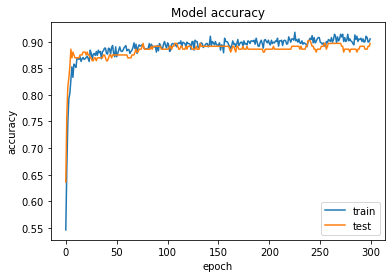

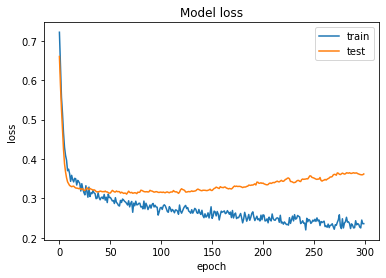

In [25]:
# summarize history for acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [27]:
model.summary()
tf.keras.utils.plot_model(model, to_file='test_keras_plot_model.png', show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                304       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 593
Trainable params: 593
Non-trainable params: 0
_________________________________________________________________
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'fo

In [28]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        77
           1       0.89      0.94      0.91       107

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



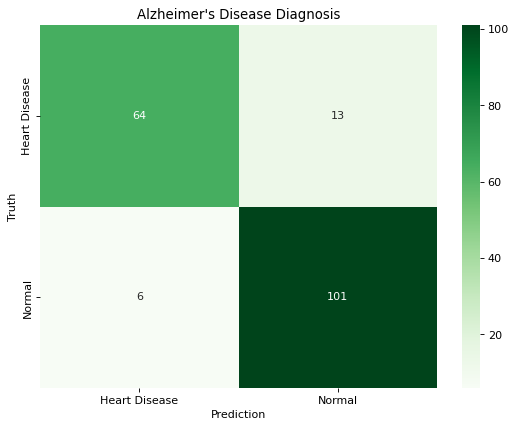

In [29]:
print(classification_report(y_test, y_pred))

#Plot the confusion matrix to understand the classification in detail

pred_ls = y_pred
test_ls = y_test

conf_arr = confusion_matrix(test_ls, pred_ls)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

CLASSES = ['Heart Disease', 'Normal']
ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels=CLASSES, yticklabels=CLASSES)

plt.title('Alzheimer\'s Disease Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

